In [2]:
import pandas as pd
import numpy as np

In [36]:
data=pd.read_csv("D:\\MachineCourse\\MachineLearnig\\Data\\Data\\2.2 Logistic Regression\\heart.csv")

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
data.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

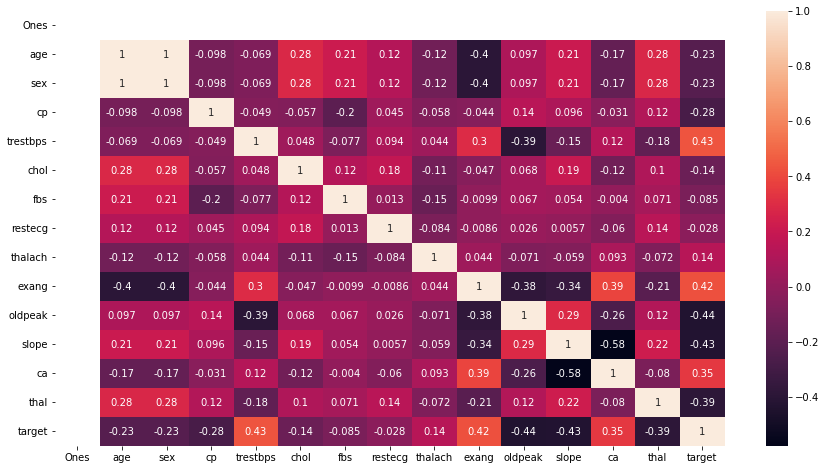

In [110]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

D:\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

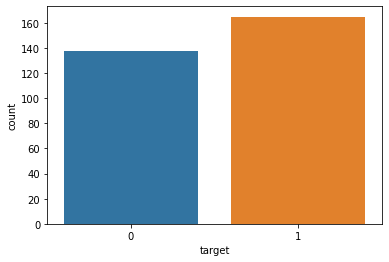

In [111]:
sns.countplot(data['target'])

In [43]:
data=data.dropna()

In [44]:
data.insert(0,'Ones',1)

In [45]:
#Scaling Data
data.iloc[:,2:-1]=data.iloc[:,1:-1]/data.iloc[:,1:-1].max()

In [46]:
positive=data[data['target'].isin([1])]

In [47]:
positive

,Ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.0,1
1,1,37,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.0,1
2,1,41,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.0,1
3,1,56,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.0,1
4,1,57,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,56,0.727273,1.0,0.333333,0.600,0.425532,0.0,0.5,0.836634,0.0,0.000000,0.0,0.0,1
161,1,55,0.714286,0.0,0.333333,0.660,0.606383,0.0,0.5,0.821782,0.0,0.193548,1.0,0.0,1
162,1,41,0.532468,1.0,0.333333,0.600,0.278369,0.0,0.5,0.900990,0.0,0.000000,1.0,0.0,1
163,1,38,0.493506,1.0,0.666667,0.690,0.310284,0.0,0.5,0.856436,0.0,0.000000,1.0,1.0,1


In [48]:
negative=data[data['target'].isin([0])]

In [49]:
import matplotlib.pyplot as plt

In [50]:
x=data.iloc[:,:-1]

In [51]:
x

,Ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,63,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00
1,1,37,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00
2,1,41,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00
3,1,56,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00
4,1,57,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,57,0.740260,0.0,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00
299,1,45,0.584416,1.0,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00
300,1,68,0.883117,1.0,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50
301,1,57,0.740260,1.0,0.000000,0.650,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25


In [52]:
y=data['target']

In [53]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [54]:
x

,Ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,63,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00
1,1,37,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00
2,1,41,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00
3,1,56,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00
4,1,57,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,57,0.740260,0.0,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00
299,1,45,0.584416,1.0,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00
300,1,68,0.883117,1.0,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50
301,1,57,0.740260,1.0,0.000000,0.650,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25


In [55]:
len(x)

303

In [1280]:
len(data)

303

In [1281]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
n_features=len(pd.DataFrame(x).columns)

In [60]:
n_features

14

In [61]:
x=x.values.tolist()

In [62]:
x

[[1.0,
  63.0,
  0.8181818181818182,
  1.0,
  1.0,
  0.725,
  0.41312056737588654,
  1.0,
  0.0,
  0.7425742574257426,
  0.0,
  0.3709677419354838,
  0.0,
  0.0],
 [1.0,
  37.0,
  0.4805194805194805,
  1.0,
  0.6666666666666666,
  0.65,
  0.4432624113475177,
  0.0,
  0.5,
  0.9257425742574258,
  0.0,
  0.564516129032258,
  0.0,
  0.0],
 [1.0,
  41.0,
  0.5324675324675324,
  0.0,
  0.3333333333333333,
  0.65,
  0.3617021276595745,
  0.0,
  0.0,
  0.8514851485148515,
  0.0,
  0.2258064516129032,
  1.0,
  0.0],
 [1.0,
  56.0,
  0.7272727272727273,
  1.0,
  0.3333333333333333,
  0.6,
  0.41843971631205673,
  0.0,
  0.5,
  0.8811881188118812,
  0.0,
  0.12903225806451613,
  1.0,
  0.0],
 [1.0,
  57.0,
  0.7402597402597403,
  0.0,
  0.0,
  0.6,
  0.6276595744680851,
  0.0,
  0.5,
  0.806930693069307,
  1.0,
  0.0967741935483871,
  1.0,
  0.0],
 [1.0,
  57.0,
  0.7402597402597403,
  1.0,
  0.0,
  0.7,
  0.3404255319148936,
  0.0,
  0.5,
  0.7326732673267327,
  0.0,
  0.06451612903225806,
  0.

In [63]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [1288]:
#h(x)=theta0+theta1*x1

In [1289]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [1290]:
#sigmoid Activation function

In [65]:
def get_inital_weights():
    weights=[]
    for i in range(n_features):
        w=np.random.rand(1)
        weights.append(w)
    return weights

In [66]:
weights= get_inital_weights()

In [67]:
weights

[array([0.37849713]),
 array([0.71156137]),
 array([0.93988131]),
 array([0.84052694]),
 array([0.77773905]),
 array([0.06924085]),
 array([0.35732192]),
 array([0.8107514]),
 array([0.48749218]),
 array([0.49131331]),
 array([0.46763155]),
 array([0.47047004]),
 array([0.25356998]),
 array([0.83869339])]

In [68]:
len(weights)

14

In [69]:
def get_Z(X):
    z=np.dot(np.matrix(X),np.matrix(weights))
    return z
    

In [71]:
z=get_Z(x)

In [72]:
z

matrix([[49.14205733],
        [29.68447646],
        [31.26461786],
        [43.19128091],
        [43.30600551],
        [43.40474487],
        [42.00102787],
        [34.45030822],
        [41.29908887],
        [44.19257648],
        [41.47989655],
        [36.70764292],
        [38.1151739 ],
        [49.57090025],
        [44.90021073],
        [38.14190017],
        [44.04812544],
        [49.83832801],
        [33.57650249],
        [52.71660888],
        [44.91636557],
        [35.20658804],
        [32.73917059],
        [48.15123876],
        [32.62613527],
        [53.61300865],
        [46.43739116],
        [39.64063069],
        [49.97110702],
        [41.53852789],
        [31.58961675],
        [49.28578557],
        [34.21863166],
        [41.65451861],
        [40.42827409],
        [35.31462559],
        [41.94132714],
        [41.79618449],
        [49.08396589],
        [48.90690056],
        [38.9751859 ],
        [36.99910795],
        [35.13838616],
        [39

In [73]:
def sigmoid(z):
    return list(np.round(1/(1+np.exp(-1*z))))

In [74]:
hx=sigmoid(z)

In [75]:
hx

[matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]

In [76]:
y=y.values.tolist()

In [86]:
#Gradient Descent
def gradient_descent(a):
    new_weights=0
    for i in range(100):
        z=get_Z(x)
        gx=sigmoid(z) 
        val=np.array(gx).reshape(303,1)-np.array(y).reshape(303,1)
        sumation_part=np.sum(val)
        new_weights=weights-(a/len(data))*sumation_part
    return new_weights

In [87]:
len(y)

303

In [88]:
weights=gradient_descent(0.1)

In [89]:
weights

array([[0.33295258],
       [0.66601682],
       [0.89433676],
       [0.79498239],
       [0.73219449],
       [0.0236963 ],
       [0.31177736],
       [0.76520685],
       [0.44194762],
       [0.44576875],
       [0.42208699],
       [0.42492548],
       [0.20802543],
       [0.79314884]])

In [92]:
#Split Data into train-test-cross validation
y_test=y[241:]
y_cv=y[181:241]
y_train=y[:181]
# X
X_test=x[241:]
X_cv=x[181:241]
X_train=x[:181]

In [93]:
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [94]:
y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [97]:
len(X_train)

181

In [98]:
#Fit Data using squared error cost
def fit_X_train():
    m=len(X_train)
    sumation=0
    z=get_Z(X_train)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(181,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_train[i])*np.log(1-gx[i])
        else:
            first_part=y_train[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    print(cost_function)
        

In [99]:
fit_X_train()

[0.0255845]


In [100]:
len(y_test)

62

In [101]:
#compute test error

def test_error():
    m=len(X_test)
    sumation=0
    z=get_Z(X_test)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(62,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_test[i])*np.log(1-gx[i])
        else:
            first_part=y_test[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    return cost_function

In [102]:
test_error_value=test_error()

In [103]:
test_error_value

array([0.07469023])

In [107]:
def cv_error():
    m=len(X_cv)
    sumation=0
    z=get_Z(X_cv)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(60,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_cv[i])*np.log(1-gx[i])
        else:
            first_part=y_cv[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    return cost_function

In [108]:
cv_error_value=cv_error()

In [109]:
cv_error_value

array([0.0771799])